In [36]:
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.cm as cm
from scipy.interpolate import griddata


def read_file(filename):

    with open(filename, 'r') as file:
        lines = file.readlines()
    
    total_rows = int(lines[0].strip())  # Read the total number of rows
    data = []
    
    for line in lines[2:]:  # Skip the first line
        values = [float(v) for v in line.split()]
        data.append(values)
    
    return np.array(data), total_rows

def plot_stress_contour(outputfilename, data, lc, ifD=0, avgR=0):
    radius = 15 * lc 
    x = (data[:, 0] - 50 * lc) / radius
    y = (data[:, 1] - 50 * lc) / radius
    stress = data[:, 3] * 160.2 / 0.1

    xi = np.linspace(np.min(x), np.max(x), 200)
    yi = np.linspace(np.min(y), np.max(y), 200)
    xi, yi = np.meshgrid(xi, yi)

    valid_mask = ~np.isnan(stress)
    zi = griddata((x[valid_mask], y[valid_mask]), stress[valid_mask], (xi, yi), method='cubic')

    # Apply mask after interpolation
    distance_squared = xi**2 + yi**2
    radius_squared = (radius + 1 * ifD + avgR)**2 / (radius**2)
    zi[distance_squared < radius_squared] = np.nan

    print(f"zi actual min = {np.nanmin(zi):.3f}, max = {np.nanmax(zi):.3f}")

    cmap = plt.colormaps.get_cmap('turbo').copy()
    cmap.set_bad('white')

    plt.figure(figsize=(4, 3))
    contour = plt.contourf(xi, yi, zi, levels=100, cmap=cmap, vmin=-1.2, vmax=3.5)
    
    # force vmax, vmin of colorbar
    m = plt.cm.ScalarMappable(cmap=cmap)
    m.set_array(zi)
    m.set_clim(-1.2, 3.5)
    cbar= plt.colorbar(m)
    
    cbar.set_label(r'$\sigma_{xx} / \sigma_{\infty}$', fontsize=20)

    plt.gca().set_aspect('equal', adjustable='box')
    plt.xlabel(r'$x/R$', fontsize=20)
    plt.ylabel(r'$y/R$', fontsize=20)
    plt.tick_params(axis='both', labelsize=14)

    plt.savefig(outputfilename, dpi=300, bbox_inches='tight')
    plt.show()
    
    
def plot_stress_error_contour(outputfilename, data, analy, lc, ifD=0, avgR=0):
    radius = 15 * lc 
    
    '''mdstress data'''
    x = (data[:, 0] - 50 * lc) / radius
    y = (data[:, 1] - 50 * lc) / radius
    stress = data[:, 3] * 160.2 / 0.1

    xi = np.linspace(np.min(x), np.max(x), 200)
    yi = np.linspace(np.min(y), np.max(y), 200)
    xi, yi = np.meshgrid(xi, yi)

    valid_mask = ~np.isnan(stress)
    zi = griddata((x[valid_mask], y[valid_mask]), stress[valid_mask], (xi, yi), method='cubic')

    
    '''analytic data'''
    x_a = (analy[:, 0] - 50 * lc) / radius
    y_a = (analy[:, 1] - 50 * lc) / radius
    stress_a = analy[:, 3] * 160.2 / 0.1

    xi_a = np.linspace(np.min(x_a), np.max(x_a), 200)
    yi_a = np.linspace(np.min(y_a), np.max(y_a), 200)
    xi_a, yi_a = np.meshgrid(xi_a, yi_a)

    valid_mask = ~np.isnan(stress_a)
    zi_a = griddata((x_a[valid_mask], y_a[valid_mask]), stress_a[valid_mask], (xi_a, yi_a), method='cubic')
    
    
    # Apply mask after interpolation
    distance_squared = xi**2 + yi**2
    radius_squared = (radius + 1 * ifD + avgR)**2 / (radius**2)
    zi[distance_squared < radius_squared] = np.nan

    print(f"zi actual min = {np.nanmin(zi):.3f}, max = {np.nanmax(zi):.3f}")

    cmap = plt.colormaps.get_cmap('turbo').copy()
    cmap.set_bad('white')

    plt.figure(figsize=(4, 3))
    contour = plt.contourf(xi, yi, abs(zi-zi_a)/0.1, levels=100, cmap=cmap , vmin=0, vmax=1.5)
    
    # force vmax, vmin of colorbar
    m = plt.cm.ScalarMappable(cmap=cmap)
    m.set_array(zi)
    m.set_clim(0, 1.5)
    cbar= plt.colorbar(m)
    
    #cbar= plt.colorbar()
    
    cbar.set_label(r'$( |\sigma_{xx}-\sigma_{xx}^{anal}|) / \sigma_{\infty}$', fontsize=14)

    plt.gca().set_aspect('equal', adjustable='box')
    plt.xlabel(r'$x/R$', fontsize=20)
    plt.ylabel(r'$y/R$', fontsize=20)
    plt.tick_params(axis='both', labelsize=14)

    plt.savefig(outputfilename, dpi=300, bbox_inches='tight')
    plt.show()

모델명: SW_StillingerWeber_1985_Si__MO_405512056662_006
Lattice Constant: 5.430949784815312
Influent Distance: 7.52336
-----------------------------
zi actual min = -0.026, max = 2.116


/var/folders/ph/4_1bb02176v2vbc5lscx_cg80000gn/T/ipykernel_1446/325514874.py:111: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar= plt.colorbar(m)


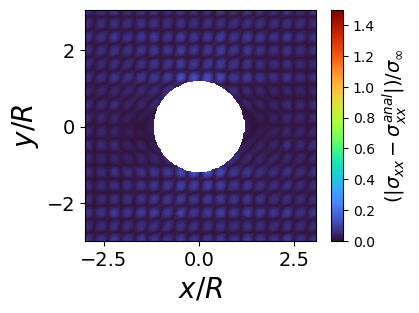

모델명: Tersoff_LAMMPS_Tersoff_1988T3_Si__MO_186459956893_004
Lattice Constant: 5.431978940963745
Influent Distance: 6.0
-----------------------------
zi actual min = -0.036, max = 2.159


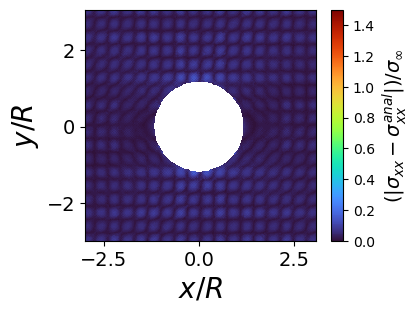

모델명: Tersoff_LAMMPS_Tersoff_1988T2_Si__MO_245095684871_004
Lattice Constant: 5.431230753660202
Influent Distance: 6.4
-----------------------------
zi actual min = -0.004, max = 2.155


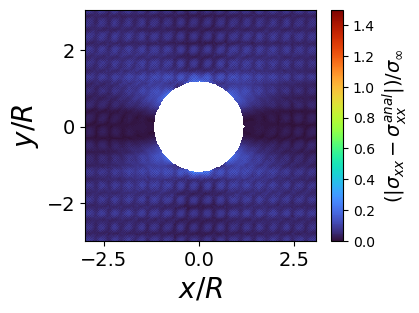

모델명: MEAM_LAMMPS_DuLenoskyHennig_2011_Si__MO_883726743759_002
Lattice Constant: 5.431141197681426
Influent Distance: 10.48
-----------------------------
zi actual min = -0.058, max = 2.113


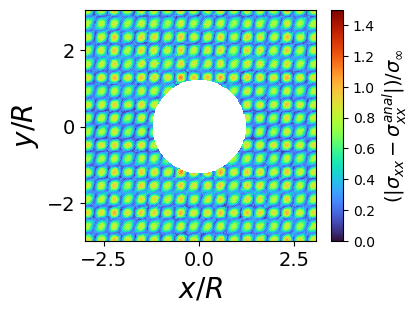

In [37]:

models = [
{"model_name": "SW_StillingerWeber_1985_Si__MO_405512056662_006", "lattice_constant": 5.430949784815312, "influent_distance": 7.52336},
{"model_name": "Tersoff_LAMMPS_Tersoff_1988T3_Si__MO_186459956893_004", "lattice_constant": 5.431978940963745, "influent_distance": 6.0},
{"model_name": "Tersoff_LAMMPS_Tersoff_1988T2_Si__MO_245095684871_004", "lattice_constant": 5.431230753660202, "influent_distance": 6.4},
{"model_name": "MEAM_LAMMPS_DuLenoskyHennig_2011_Si__MO_883726743759_002", "lattice_constant": 5.431141197681426, "influent_distance": 10.48},
]


for model in models:
    
    modelname = model["model_name"]
    lc = model["lattice_constant"]
    influenceD = model["influent_distance"]
    
    print(f"모델명: {modelname}")
    print(f"Lattice Constant: {lc}")
    print(f"Influent Distance: {influenceD}")
    print("-----------------------------")
    
    # output analytic solution
    file1 = "./" + modelname + "_Analytic.stress"
    data1, total_rows1 = read_file(file1)
    
    #outputfilename = modelname + "_Analytic.png"
    #plot_stress_contour(outputfilename, data1,lc,0,0)
    
    file2 = "./project_hardy8_" + modelname + ".stress"
    data2, total_rows2 = read_file(file2)
    outputfilename = modelname + "_error_hardy8.png"
    plot_stress_error_contour(outputfilename, data2,data1,lc, influenceD, avR)
    
    # Hardy 8, 
    #file1 = "./project_hardy8_" + modelname + ".stress"
    #data1, total_rows1 = read_file(file1)
    #outputfilename = modelname + "_project_hardy8.png"
    #avR=8
    #plot_stress_contour(outputfilename, data1,lc,influenceD,avR)

    